# Microsoft Movie Analysis 


**Author:** Tony Bennett 
***

![MovieReel](images/movie_reel.jpg)

## Overview
***
The film business has always been an industry where millions of dollars can be made if a studio establishs itself with an audience and creates content that will cause them to flock to theaters. The film industry used to contain a few studios that really made all the money but with increasing need for content and digital media we are seeing differnet companies like Netflix and Amazon come in to disrupt the film monopoly. 

## Business Problem
***
The multinational technology corporation Microsoft has decided it wants to get into the film business. The problem is that they know nothing about movies and the best way to create them. In this analysis films doing best at the box office will be analyzed to provide concrete recommendations to Microsoft to show them which way to proceed in the film making business. 



## Data Preparation and Understanding 
***

I mainly used 4 dataframes for analysis. Not all the data I needed for some of the analysis existed in one dataframe so they had to be merged. The variable I focused on mostly was Total Gross Box Office. This is a good metric for a company like Microsoft because they are going to want a good return on their investment. This was the sum of Foreign and Domestic Box offices in the IMDB database as well as a column in BOM gross. I plotted box office growth against studio, specfic films, genre and production budget. I dropped missing data or used data that was recent enough to have all rows filled. Gross Box Office is consistently a larger number so it often had to be measured in Billions.  Using recent data was important to the analysis as film box offices numbers have changed drastically over the years due to the way films are made and marketed. Also inflation would have skewed the analysis had data been taken that was too old.  



## Data Modeling
***
I focused on mostly bar charts and scatter plots to find data visualization. I believe these are the easiest to read and convey a strong message. I was originally going to create a plot that focused on the average of movie ratings against genres but realized it was not going to help me create a solid recommendation so I decided to focus more on box office trends. 




In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Exploring Dataframes

In [3]:
# Here you run your code to explore the data
df_imdb_titles = pd.read_csv("data/zippedData/imdb.title.basics.csv.gz",)


In [4]:
#Taking a look at data from newly imported data frames 

In [5]:
df_imdb_titles.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
bom_movie_gross = pd.read_csv("data/zippedData/bom.movie_gross.csv.gz",index_col=0)


In [7]:
bom_movie_gross.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
bom_movie_gross.shape

(3387, 4)

In [9]:
bom_movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [10]:
df_imdb_titles_rating = pd.read_csv("data/zippedData/imdb.title.ratings.csv.gz")

In [11]:
df_imdb_titles_rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [12]:
df_imdb_titles.shape

(146144, 6)

In [13]:
df_imdb_titles.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [14]:
df_imdb_titles_rating.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
df_imdb_titles_rating.shape

(73856, 3)

In [16]:
df_imdb_titles_rating.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


## Analysis

## Boxoffice and Studio

### Visualization 1 


 BOM movie gross information looks interesting so I will clean it up a little to be used for a chart  showing top movie studios and their total grosses could show microsoft how they should model their studio for
 profitablity 

In [17]:
# checking to make sure data is from a relvanat time frame 
bom_movie_gross['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [18]:
# made copy of bom_movie gross for data cleaning 
bom_clean = bom_movie_gross.copy()

In [19]:
bom_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [20]:
# clearing out empty values becasue we want to manipulate the data and we don't want null values to skew visualtizations 

bom_clean = bom_clean.dropna()

In [21]:
#converting foreign_gross(string) to a float to match domestic_gross
bom_clean['foreign_gross'] = pd.to_numeric(bom_clean['foreign_gross'],errors='coerce')
bom_clean.dtypes

studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [22]:
# can now make a new columnm with total box offices
bom_clean['total_gross'] = bom_clean['domestic_gross'] + bom_clean['foreign_gross']



In [23]:
#add up all total_grosses grouped by studio 
studio_gross = bom_clean.groupby(['studio'], as_index=False)['total_gross'].sum()
# found studios that produce the most money from their films 
top_studio_gross = studio_gross.nlargest(10,'total_gross')
top_studio_gross

,studio,total_gross
22,BV,4.257488e+10
57,Fox,3.098037e+10
163,WB,3.079150e+10
155,Uni.,2.851551e+10
142,Sony,2.240472e+10
126,Par.,1.944420e+10
164,WB (NL),1.031410e+10
89,LGF,8.467471e+09
88,LG/S,5.318924e+09
116,P/DW,5.076500e+09


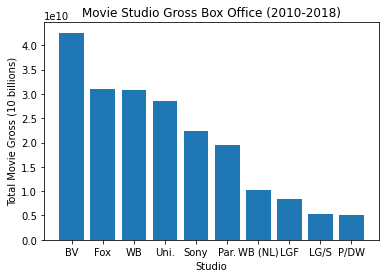

In [24]:
# Here you run your code to clean the data
fig, ax = plt.subplots()
ax.set_ylabel('Total Movie Gross (10 billions)')
ax.set_xlabel('Studio')
ax.set_title('Movie Studio Gross Box Office (2010-2018)')
ax.bar(x=top_studio_gross['studio'], height = top_studio_gross['total_gross'])
plt.savefig('images/movie_studio.png')
plt.show()


From this chart we can see that BV(marvel) has grossed over 40 billion dollars at the box office over 10 years. Fox and Warner Brothers follow behind. This is clearly microsofts comeptition as they want to become a big name studio just like these studios

### Visualization 2

 I believe another good visualization to explore would be the most most succesfull films from the most recent year data 
 collected.
 This way microsoft can an even closer look at the type of films that are being produced 

In [25]:
bom_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, Toy Story 3 to Antonio Lopez 1970: Sex Fashion & Disco
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          2007 non-null   object 
 1   domestic_gross  2007 non-null   float64
 2   foreign_gross   2002 non-null   float64
 3   year            2007 non-null   int64  
 4   total_gross     2002 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 94.1+ KB


In [26]:
#import movie budgets data frame 
movie_budgets = pd.read_csv("data/zippedData/tn.movie_budgets.csv.gz")

In [27]:
# remove dollar and commas sign to help convert these strings to integers
movie_budgets['production_budget'] =  movie_budgets['production_budget'].str.replace('$','')
movie_budgets['worldwide_gross'] =  movie_budgets['worldwide_gross'].str.replace('$','')
movie_budgets['production_budget'] =  movie_budgets['production_budget'].str.replace(',','')
movie_budgets['worldwide_gross'] =  movie_budgets['worldwide_gross'].str.replace(',','')

In [28]:
# convert production budget and movie gross into integers 
movie_budgets['production_budget'] =  movie_budgets['production_budget'].astype(float)
movie_budgets['worldwide_gross'] =  movie_budgets['worldwide_gross'].astype(float)
# movie_budgets[1] = movie_budgets[1].astype(int)

In [29]:
# splits release_date section to give us year 
movie_budgets['year'] = pd.to_datetime(movie_budgets['release_date']).dt.year

In [30]:
movie_prod = movie_budgets.copy()
movie_prod.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,2017


In [31]:
movie_prod = movie_prod[movie_prod['year'] == 2018]

In [32]:
# get top movies list 
top_bo_movies= movie_prod.nlargest(10, 'worldwide_gross')
top_bo_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,2018
41,42,"Feb 16, 2018",Black Panther,200000000.0,"$700,059,566",1.348258e+09,2018
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,"$417,719,760",1.305773e+09,2018
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,"$608,581,744",1.242521e+09,2018
135,36,"Dec 21, 2018",Aquaman,160000000.0,"$335,061,807",1.146895e+09,2018
983,84,"Nov 2, 2018",Bohemian Rhapsody,55000000.0,"$216,303,339",8.949853e+08,2018
302,3,"Oct 5, 2018",Venom,116000000.0,"$213,511,408",8.536286e+08,2018
91,92,"Jul 27, 2018",Mission: ImpossibleâFallout,178000000.0,"$220,159,104",7.874566e+08,2018
314,15,"May 18, 2018",Deadpool 2,110000000.0,"$324,591,735",7.866806e+08,2018
59,60,"Nov 16, 2018",Fantastic Beasts: The Crimes of Grindelwald,200000000.0,"$159,555,901",6.522201e+08,2018


C:\Users\tonym\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tonym\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tonym\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tonym\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0, flags=flags)


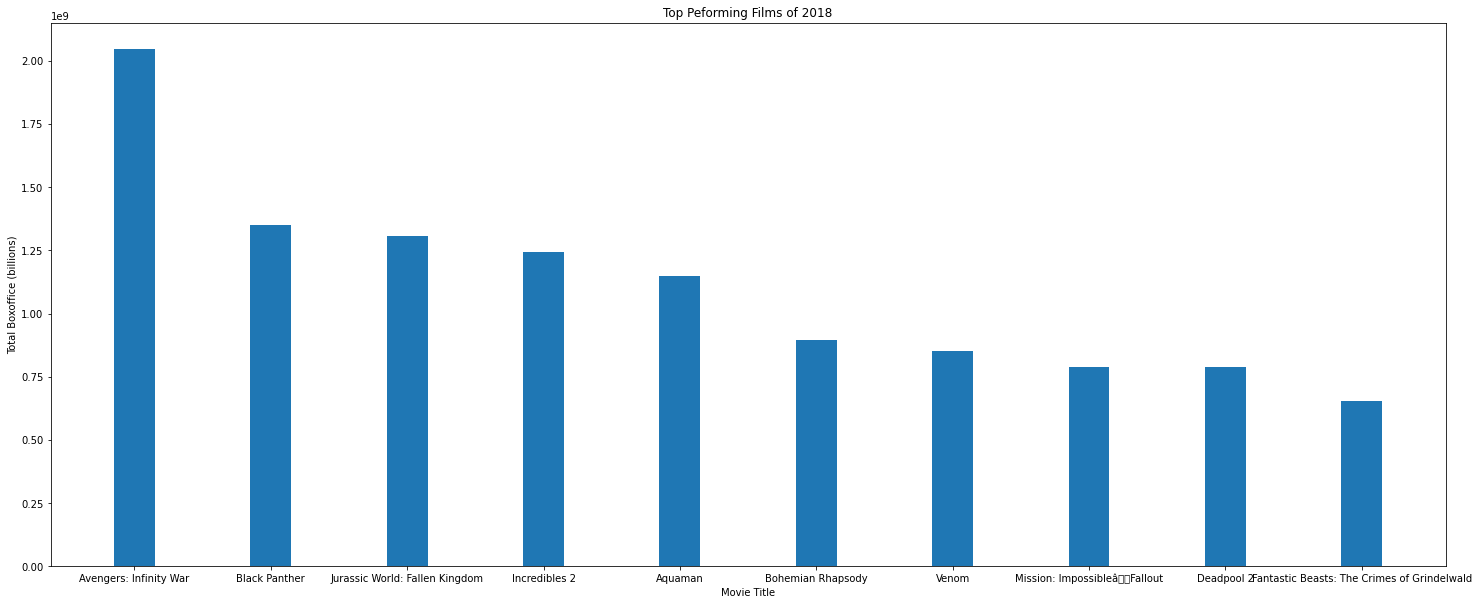

In [33]:
fig, ax = plt.subplots(figsize = (25,10))
ax.set_ylabel('Total Boxoffice (billions)')
ax.set_xlabel('Movie Title')
ax.set_title('Top Peforming Films of 2018')
ax.bar(x = top_bo_movies['movie'], height = top_bo_movies['worldwide_gross'], width = .3)
plt.savefig('images/film_gross.png')
plt.show()

This chart zooms in on the studio chart presented above. Giving a break down of the top ten movies in 2018. Many are connected to another series. 

## Genre and Box Office 

### Visualization 1

 A scatter plot would be a clear way to show how action movie box offices have grown over the years 


In [34]:
# start by making copies of imdb title df and bom df so we can merge and change them 
df_title_copy2 = df_imdb_titles.copy()
bom_copy2 = bom_clean.copy() 


We can check heads and shapes of copies and striping awayy null values of imdb titles 

In [35]:
df_title_copy2=df_title_copy2.dropna()

In [36]:
df_title_copy2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


 We can reset the index to make title index of the BOM data base a column
 This will help with merge 

In [37]:

bom_copy2 = bom_copy2.reset_index()

In [38]:
bom_copy2.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [39]:
# merged togther databases to get acesses to genre and box office 
bom_imdb_t = df_title_copy2.merge(bom_copy2, left_on =['primary_title'] , right_on =['title'])
bom_imdb_t.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000.0,2012,8744000.0
1,tt2404548,On the Road,On the Road,2011,90.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt3872966,On the Road,On the Road,2013,87.0,Documentary,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
3,tt4339118,On the Road,On the Road,2014,89.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
4,tt5389486,On the Road,On the Road,2015,39.0,Documentary,On the Road,IFC,744000.0,8000000.0,2012,8744000.0


In [40]:
# remove adventure films from data frame 
no_action = bom_imdb_t[~bom_imdb_t['genres'].str.contains('Adventure')] 
no_action.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,total_gross
1,tt2404548,On the Road,On the Road,2011,90.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt3872966,On the Road,On the Road,2013,87.0,Documentary,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
3,tt4339118,On the Road,On the Road,2014,89.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
4,tt5389486,On the Road,On the Road,2015,39.0,Documentary,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
5,tt5647250,On the Road,On the Road,2016,121.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8744000.0


In [41]:
#making separate dataframe that has only adventure films 
action_genre = bom_imdb_t[bom_imdb_t['genres'].str.contains("Adventure")]
action_genre.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000.0,2012,8744000.0
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,188100000.0
8,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,NaN,2015,NaN
13,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",Tangled,BV,200800000.0,391000000.0,2010,591800000.0
14,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",John Carter,BV,73100000.0,211100000.0,2012,284200000.0


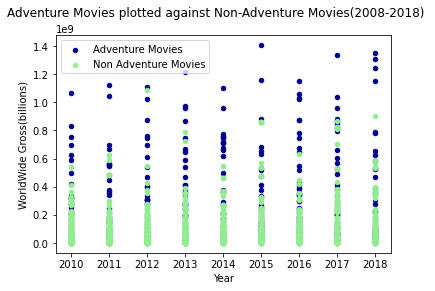

In [42]:
# scatter plot of action films non adventure films over time by plotting non-adventure film dataframe against 
# the dataframe with only adventure films 
ax = action_genre.plot.scatter(x="year", y = "total_gross",color = "DarkBlue", label = "Adventure Movies")
no_action.plot.scatter(x = "year", y = "total_gross" , color = "LightGreen", label = "Non Adventure Movies", ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('WorldWide Gross(billions)' )
plt.suptitle('Adventure Movies plotted against Non-Adventure Movies(2008-2018) ')
plt.savefig('images/adventure_scatter.png')
plt.show()

Scatter plot shows that action movies have consistently out performed other film in the box office. International audiences and domestic audiences want to see their favorite action/adventure stars at theateres over other films 

### Visualization 2

Another visual to look at would be genre and box office over time using a bar chart

In [43]:
imdb_title_3 = df_imdb_titles.copy()
bom_clean2 = bom_clean.copy()

In [44]:
# removed commas and separate genre coulum to give each record its own row 
imdb_title_3['genres'] = imdb_title_3['genres'].str.split(',')
# top_voted2 = top_voted2['genres'].str.split(',',expand = True)
imdb_title_3 = imdb_title_3.explode('genres')

In [45]:
# merge imdb title and BOM database to get access to genre and total gross box office 
bom_imdb_genre = imdb_title_3.merge(bom_clean2, left_on =['primary_title'] , right_on =['title'])
bom_imdb_genre

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0337692,On the Road,On the Road,2012,124.0,Adventure,IFC,744000.0,8000000.0,2012,8744000.0
1,tt0337692,On the Road,On the Road,2012,124.0,Drama,IFC,744000.0,8000000.0,2012,8744000.0
2,tt0337692,On the Road,On the Road,2012,124.0,Romance,IFC,744000.0,8000000.0,2012,8744000.0
3,tt2404548,On the Road,On the Road,2011,90.0,Drama,IFC,744000.0,8000000.0,2012,8744000.0
4,tt3872966,On the Road,On the Road,2013,87.0,Documentary,IFC,744000.0,8000000.0,2012,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...
4672,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,WGUSA,747000.0,82100000.0,2018,82847000.0
4673,tt8851262,Spring Fever,Spring Fever,2019,NaN,Comedy,Strand,10800.0,150000.0,2010,160800.0
4674,tt8851262,Spring Fever,Spring Fever,2019,NaN,Horror,Strand,10800.0,150000.0,2010,160800.0
4675,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Documentary,Trafalgar,4200000.0,16100000.0,2018,20300000.0


 We can now find sum of total box offices grouped by genre 

In [46]:
# add up sums of box offices and grouping by genre 
box_office_genres = bom_imdb_genre.groupby(['genres']).agg({'total_gross' : ['sum']}).reset_index()

In [47]:
# Gives top ten genres based on sum of total gross box office 
top_box_genres = box_office_genres.nlargest(10, ('total_gross','sum'))
top_box_genres

,genres,total_gross
,,sum
1,Adventure,1.184622e+11
0,Action,1.051982e+11
4,Comedy,7.818299e+10
7,Drama,7.185167e+10
2,Animation,3.943573e+10
17,Sci-Fi,3.729742e+10
19,Thriller,3.456644e+10
9,Fantasy,2.782691e+10
5,Crime,1.858052e+10


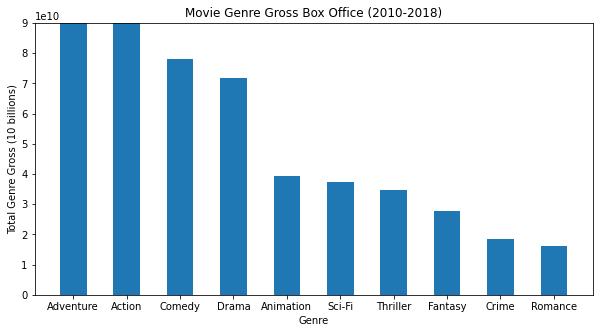

In [48]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Total Genre Gross (10 billions)')
ax.set_xlabel('Genre')
ax.set_title('Movie Genre Gross Box Office (2010-2018)')
ax.set_ylim(0,90000000000)
ax.bar(x=top_box_genres['genres'], height = top_box_genres['total_gross']['sum'], width = .5)
plt.savefig('images/genre_gross.png')
plt.show()

Adventure and action really did well here. Comedy and drama not far behind. People don't like to go to films that have a simply 
one genre of the last few listed. They would still go to see them if they had elements of action and adventure. It is clear that the enegry and ambience of action and adevnture films are unmatched in terms of box office sales

## Production Budget vs Box Office 

### Visualization 1

A scatter plot testing production budget vs total film gross would be good to see a correlation exists. A postive correlation
would be good for microsoft as they have some money to spend on films 

In [49]:
# transfer the year from release_date into its own columnm 
movie_budgets['year'] = pd.to_datetime(movie_budgets['release_date']).dt.year

In [50]:
# checkking to make sure world_wide gross is now a float instead of string object 
movie_budgets['worldwide_gross'].unique()

array([2.77634528e+09, 1.04566388e+09, 1.49762350e+08, ...,
       2.40495000e+05, 1.33800000e+03, 1.81041000e+05])

In [51]:
# sorts dataframe from most recent year descending 
movie_budgets = movie_budgets.sort_values(by = ['year'], ascending = False)

In [52]:
# gives me a range of movies from a relvant time period that have value for world wide gross 
movie_budgets = movie_budgets[(movie_budgets['year'] >= 2010) & (movie_budgets['year'] <= 2018)]


In [53]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
1677,78,"Aug 17, 2018",Mile 22,35000000.0,"$36,108,758",66295121.0,2018
1999,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000.0,"$490,973",648599.0,2018
357,58,"Mar 9, 2018",A Wrinkle in Time,103000000.0,"$100,478,608",133401882.0,2018
277,78,"Jul 13, 2018",Skyscraper,125000000.0,"$68,420,120",304115534.0,2018
177,78,"Mar 29, 2018",Ready Player One,150000000.0,"$137,690,172",579290136.0,2018


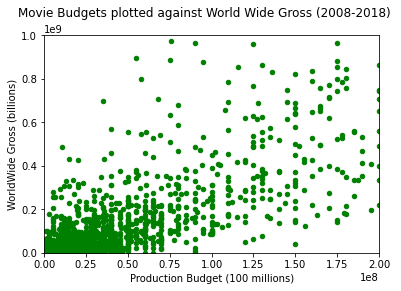

In [54]:
ax = movie_budgets.plot.scatter(x="production_budget", y = "worldwide_gross",color = "Green")
ax.set_xlim(0,200000000)
ax.set_ylim(0,1000000000)
ax.set_xlabel('Production Budget (100 millions)')
ax.set_ylabel('WorldWide Gross (billions)')
plt.suptitle('Movie Budgets plotted against World Wide Gross (2008-2018) ')
plt.savefig('images/prodbud_totalgross.png')
plt.show()

This shows a postive correlation between a higher production budget and box office returns. 

### Visualization 2

Another good visualization to help this final busines recomendation would be bar chart with the top movies of 2018 
 showing their production budgets 


In [55]:
new_prod = movie_budgets.copy()

In [56]:
# only want data from year 2018 
new_prod = new_prod[new_prod['year'] == 2018]


In [57]:
# sorting dataframe by world gross descending 
new_prod = new_prod.sort_values(by = ['worldwide_gross'], ascending = False)
new_prod.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,2018
41,42,"Feb 16, 2018",Black Panther,200000000.0,"$700,059,566",1.348258e+09,2018
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,"$417,719,760",1.305773e+09,2018
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,"$608,581,744",1.242521e+09,2018
135,36,"Dec 21, 2018",Aquaman,160000000.0,"$335,061,807",1.146895e+09,2018


 Create chart from top 2018 films films and show their production budgets 

In [58]:
# checking top prduction budgets for technical analysis 
top_prod_budget = new_prod.nlargest(10,'production_budget')
top_prod_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,2018
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000.0,"$213,767,512",3.931513e+08,2018
41,42,"Feb 16, 2018",Black Panther,200000000.0,"$700,059,566",1.348258e+09,2018
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,"$608,581,744",1.242521e+09,2018
59,60,"Nov 16, 2018",Fantastic Beasts: The Crimes of Grindelwald,200000000.0,"$159,555,901",6.522201e+08,2018
91,92,"Jul 27, 2018",Mission: ImpossibleâFallout,178000000.0,"$220,159,104",7.874566e+08,2018
93,94,"Aug 10, 2018",The Meg,178000000.0,"$145,443,742",5.295307e+08,2018
102,3,"Nov 21, 2018",Ralph Breaks The Internet,175000000.0,"$201,091,711",5.242837e+08,2018
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,"$417,719,760",1.305773e+09,2018
135,36,"Dec 21, 2018",Aquaman,160000000.0,"$335,061,807",1.146895e+09,2018


In [59]:
#cut down dataframe to the top 10 worldwide_gross to make it easier to graph  
top_prod = new_prod.nlargest(10,'worldwide_gross')
top_prod

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,2018
41,42,"Feb 16, 2018",Black Panther,200000000.0,"$700,059,566",1.348258e+09,2018
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,"$417,719,760",1.305773e+09,2018
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,"$608,581,744",1.242521e+09,2018
135,36,"Dec 21, 2018",Aquaman,160000000.0,"$335,061,807",1.146895e+09,2018
983,84,"Nov 2, 2018",Bohemian Rhapsody,55000000.0,"$216,303,339",8.949853e+08,2018
302,3,"Oct 5, 2018",Venom,116000000.0,"$213,511,408",8.536286e+08,2018
91,92,"Jul 27, 2018",Mission: ImpossibleâFallout,178000000.0,"$220,159,104",7.874566e+08,2018
314,15,"May 18, 2018",Deadpool 2,110000000.0,"$324,591,735",7.866806e+08,2018
59,60,"Nov 16, 2018",Fantastic Beasts: The Crimes of Grindelwald,200000000.0,"$159,555,901",6.522201e+08,2018


C:\Users\tonym\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tonym\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tonym\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tonym\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0, flags=flags)


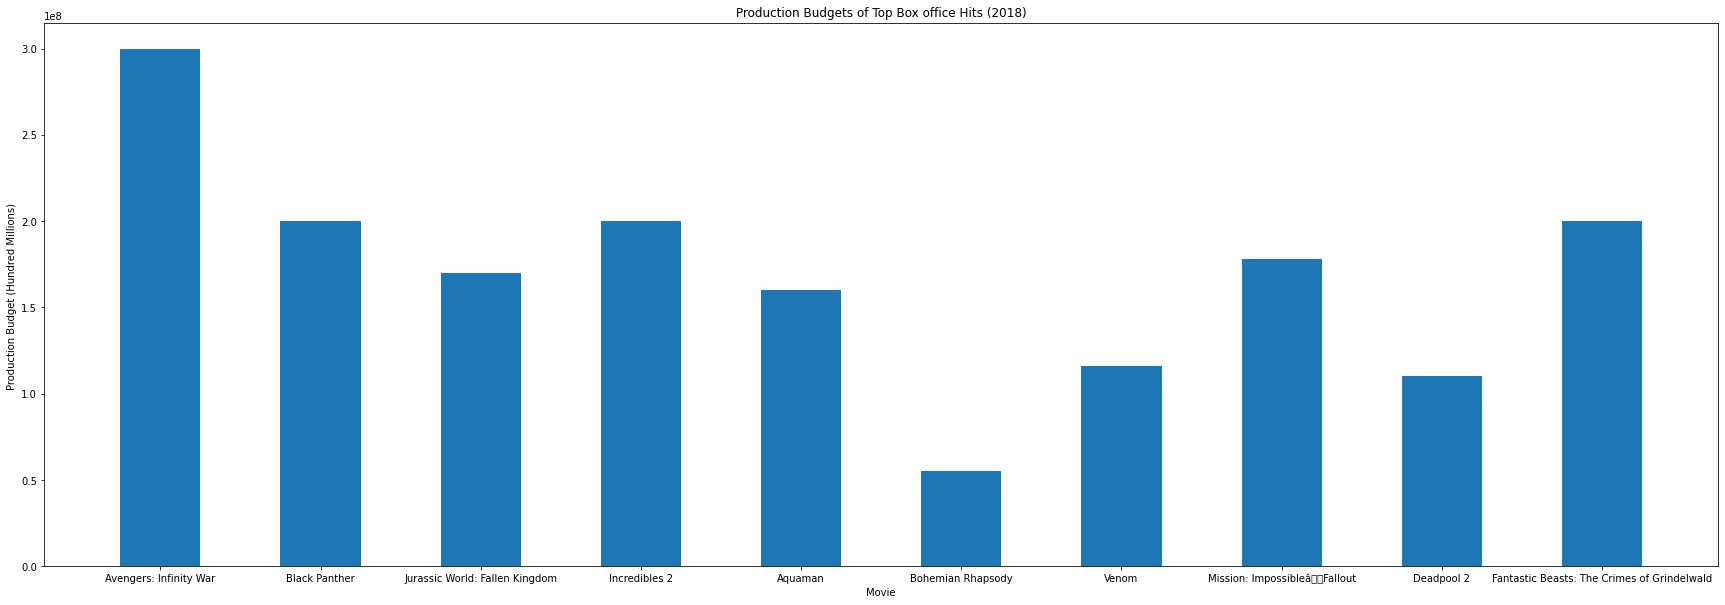

In [60]:
fig, ax = plt.subplots(figsize = (30,10))
ax.set_ylabel('Production Budget (Hundred Millions) ')
ax.set_xlabel('Movie')
ax.set_title('Production Budgets of Top Box office Hits (2018)')
ax.bar(x=top_prod['movie'], height = top_prod['production_budget'], width = .5)
plt.savefig('images/prodbud_films.png')
plt.show()

This shows the production budgets of the top ten box office hits of 2018. Helps with our postive correlation case. Most of the films here have high production budget.

## Evaluation
***
I believe the data models used could provide solid base information to a big company like Microsoft. The process of planning and building a studio structure would take 1000s of hours and many other rounds of data analysis. My data analysis is a good starting point for them and really shows them where to start digging furthur into the data.  


## Conclusions
***
Recomendations: 

1. Analyze how top box office films capitilze on their success  
2. Focus on films in the action/adventure genre
3. Boosting Production Budget will help boost chances of higher box office returns 

Its important to acknowledge some limitations in the analysis. The dataframes obviously did not have every movie and that could have skewed the data. Box office also does not tell the whole story and if films aren't doing well with audiences rating wise there is a less of a chance of building up a solid sequel/film dynasty that fans would know and love. 

To improve this project I would to spend a litte bit more time on other varibles besides total gross box office. I would also like to calculate return on investment for different genres. I also would have liked to gotten a second pair of eyes on the data to make sure my calculations and aggregations were correct.   



